Importing libraries.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)#ignore data deprecation warnings
warnings.filterwarnings('ignore', module='numpy')#ignore warnings realted to numpy

About dataset

In [14]:
anime_df = pd.read_csv('Data/anime.csv')
rating_df = pd.read_csv('Data/rating.csv')
print("Anime CSV")
print(anime_df.head())
print("Rating CSV")
print(rating_df.head())

Anime CSV
   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  
Rating CSV
   user_id  anime_id  rating
0        1        20      -1
1        1        24      -1
2        1        79      -1
3        

In [15]:
print(f'Anime_df shape: {anime_df.shape}')
print(f'rating_df shape: {rating_df.shape}')

Anime_df shape: (12294, 7)
rating_df shape: (7813737, 3)


In [16]:
print(f"\nGlimpse of The Dataset :")
anime_df.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})


Glimpse of The Dataset :


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen",TV,64,9.260000,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.250000,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.170000,673572
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.160000,151266


In [17]:
print(f"Informations About Anime Dataset :\n")
print(anime_df.info())

Informations About Anime Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


In [18]:
print(f"\nGlimpse of The rating Dataset :")
rating_df.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})


Glimpse of The rating Dataset :


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [19]:
print(f"Informations About rating Dataset :\n")
print(rating_df.info())

Informations About rating Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


In [23]:
print("Anime csv summary")
anime_df.describe().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Anime csv summary


,count,mean,std,min,25%,50%,75%,max
anime_id,12294.000000,14058.221653,11455.294701,1.000000,3484.250000,10260.500000,24794.500000,34527.000000
rating,12064.000000,6.473902,1.026746,1.670000,5.880000,6.570000,7.180000,10.000000
members,12294.000000,18071.338864,54820.676925,5.000000,225.000000,1550.000000,9437.000000,1013917.000000


In [24]:
anime_df.describe(include=object).T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,count,unique,top,freq
name,12294,12292,Saru Kani Gassen,2
genre,12232,3264,Hentai,823
type,12269,6,TV,3787
episodes,12294,187,1,5677


In [25]:
duplicate_name = anime_df[anime_df.duplicated(subset=['name'], keep='first')]
print(duplicate_name)                             

       anime_id                     name  \
10141     30059         Saru Kani Gassen   
10194     33195  Shi Wan Ge Leng Xiaohua   

                                            genre   type episodes  rating  \
10141                                       Drama  Movie        1    4.75   
10194  Action, Adventure, Comedy, Fantasy, Parody  Movie        1    7.07   

       members  
10141       76  
10194      110  


In [26]:
anime_df['name'].value_counts().head(10)

name
Saru Kani Gassen                    2
Shi Wan Ge Leng Xiaohua             2
Pink no Curtain                     1
Original Video Romance Animation    1
Gintama°                            1
Sagurare Otome The Animation        1
Saimin Class                        1
Sakura no Mori                      1
Shikkoku no Shaga The Animation     1
Silent Chaser Kagami                1
Name: count, dtype: int64

In [28]:
#find anime names that appear more than once
duplicate_names = anime_df['name'].value_counts()
duplicate_names = duplicate_names[duplicate_names > 1].index  # Get names with more than one occurrence

#filter the dataset to show only rows with duplicate names
duplicate_anime_df = anime_df[anime_df['name'].isin(duplicate_names)]

print(duplicate_anime_df)

       anime_id                     name  \
10140     22399         Saru Kani Gassen   
10141     30059         Saru Kani Gassen   
10193     33193  Shi Wan Ge Leng Xiaohua   
10194     33195  Shi Wan Ge Leng Xiaohua   

                                            genre   type episodes  rating  \
10140                                        Kids    OVA        1    5.23   
10141                                       Drama  Movie        1    4.75   
10193                              Comedy, Parody    ONA       12    6.67   
10194  Action, Adventure, Comedy, Fantasy, Parody  Movie        1    7.07   

       members  
10140       62  
10141       76  
10193      114  
10194      110  


In [30]:
print("Null Values of Anime Dataset :")
anime_df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Null Values of Anime Dataset :


,anime_id,name,genre,type,episodes,rating,members
0,0,0,62,25,0,230,0


In [31]:
print("Dropping null values")
anime_df.dropna(axis=0, inplace=True)
anime_df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Dropping null values


,anime_id,name,genre,type,episodes,rating,members
0,0,0,0,0,0,0,0


In [33]:
anime_df.shape

(12017, 7)

In [38]:
print("Finding duplicate rows")
duplicate_anime = anime_df[anime_df.duplicated()].shape[0]
print(f'Number of duplcate rows: {duplicate_anime}')

Finding duplicate rows
Number of duplcate rows: 0


In [40]:
print("Summary of rating dataset")
rating_df.describe().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Summary of rating dataset


,count,mean,std,min,25%,50%,75%,max
user_id,7813737.000000,36727.956745,20997.946119,1.000000,18974.000000,36791.000000,54757.000000,73516.000000
anime_id,7813737.000000,8909.072104,8883.949636,1.000000,1240.000000,6213.000000,14093.000000,34519.000000
rating,7813737.000000,6.144030,3.727800,-1.000000,6.000000,7.000000,9.000000,10.000000


In [42]:
print("Null Values of Rating Dataset :")
rating_df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Null Values of Rating Dataset :


,user_id,anime_id,rating
0,0,0,0


In [46]:
print("No of duplicate rows in rating df")
duplicate_rating = rating_df[rating_df.duplicated()].shape[0]
print(duplicate_rating)

No of duplicate rows in rating df
1


In [47]:
print(rating_df.shape[0])
rating_df.drop_duplicates(keep='first', inplace=True)
print(rating_df.shape[0])

7813737
7813736


Merging anime and rating dfs

In [54]:
fulldata_df = pd.merge(anime_df, rating_df, on='anime_id', suffixes=[None, '_user'])
fulldata_df = fulldata_df.rename(columns={'rating_user':'user_rating'})
print("Merged Dataset")
print(fulldata_df.shape)
fulldata_df.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Merged Dataset
(7813610, 9)


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,278,-1


In [60]:
anime_name = 'Under World'
filtered_df = fulldata_df[fulldata_df['name']==anime_name]
print(filtered_df.shape)

(4, 9)


In [62]:
unique_names = anime_df['type'].unique()

# Convert to DataFrame for better display
unique_names_df = pd.DataFrame(unique_names, columns=["Unique Anime Names"])
print(unique_names_df)

  Unique Anime Names
0              Movie
1                 TV
2                OVA
3            Special
4              Music
5                ONA


Custom Palette for Visualization

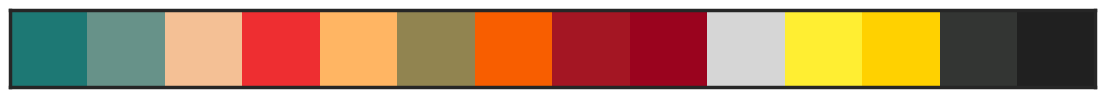

In [63]:
sns.set_style("white")
sns.set_context("poster",font_scale = .7)

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

sns.palplot(sns.color_palette(palette))
plt.show()

Finding top anime community

In [71]:
top_anime = fulldata_df.copy()
top_anime.drop_duplicates(subset='name', keep='first', inplace=True)
top_anime_temp = top_anime.sort_values(['members'], ascending=False)
print(top_anime.shape)


(11161, 9)


In [74]:
top_anime_temp.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
344257,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917,3,10
568937,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229,1,-1
3160071,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100,1,10
2199,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3,10
1007976,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796,1,-1


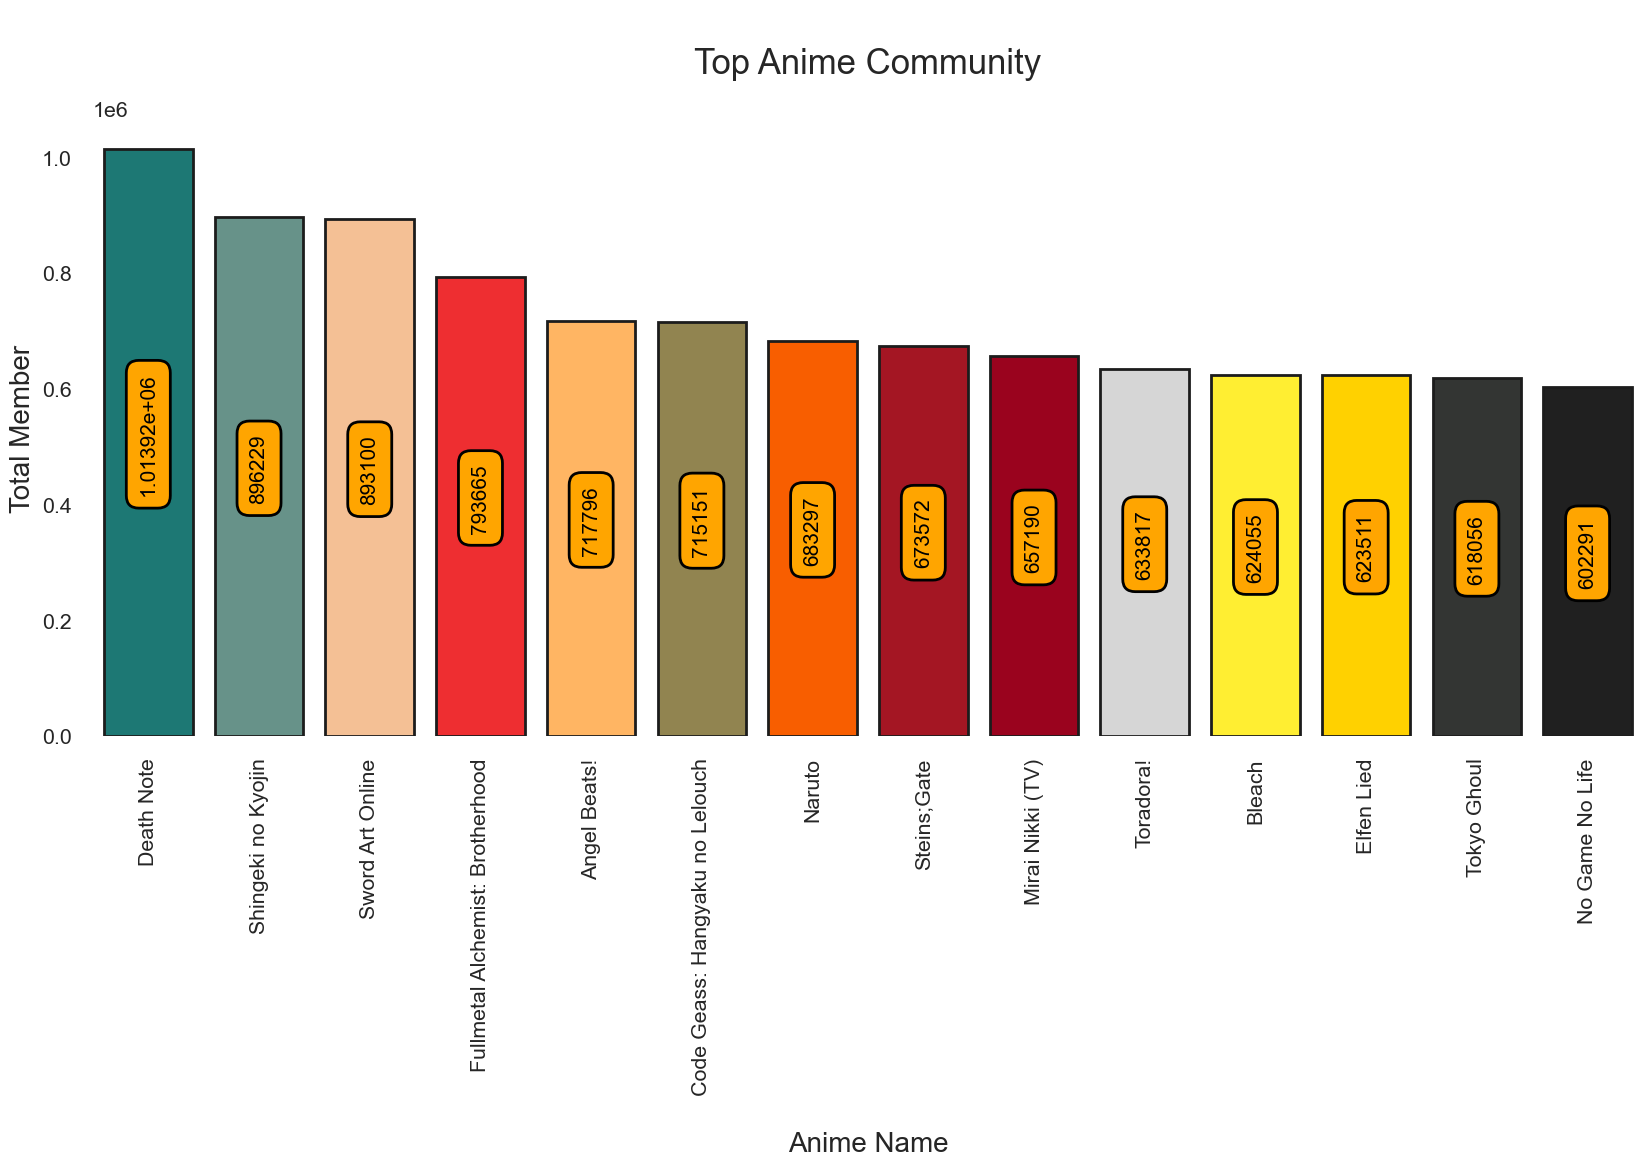

In [75]:
plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_anime_temp['name'][:14],y=top_anime_temp['members'],order=top_anime_temp["name"][:14],palette=palette, saturation=1, edgecolor = '#1c1c1c', linewidth = 2)
p.axes.set_title('\nTop Anime Community\n', fontsize=25)
plt.ylabel("Total Member" , fontsize = 20)
plt.xlabel("\nAnime Name" , fontsize = 20)
# plt.yscale("log")
plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 6,size = 15,color = "black",rotation = 90,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

In [77]:
print("Anime Categories")
top_anime_temp["type"].value_counts().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Anime Categories


type,TV,OVA,Movie,Special,ONA,Music
count,3402,3090,2111,1581,526,451


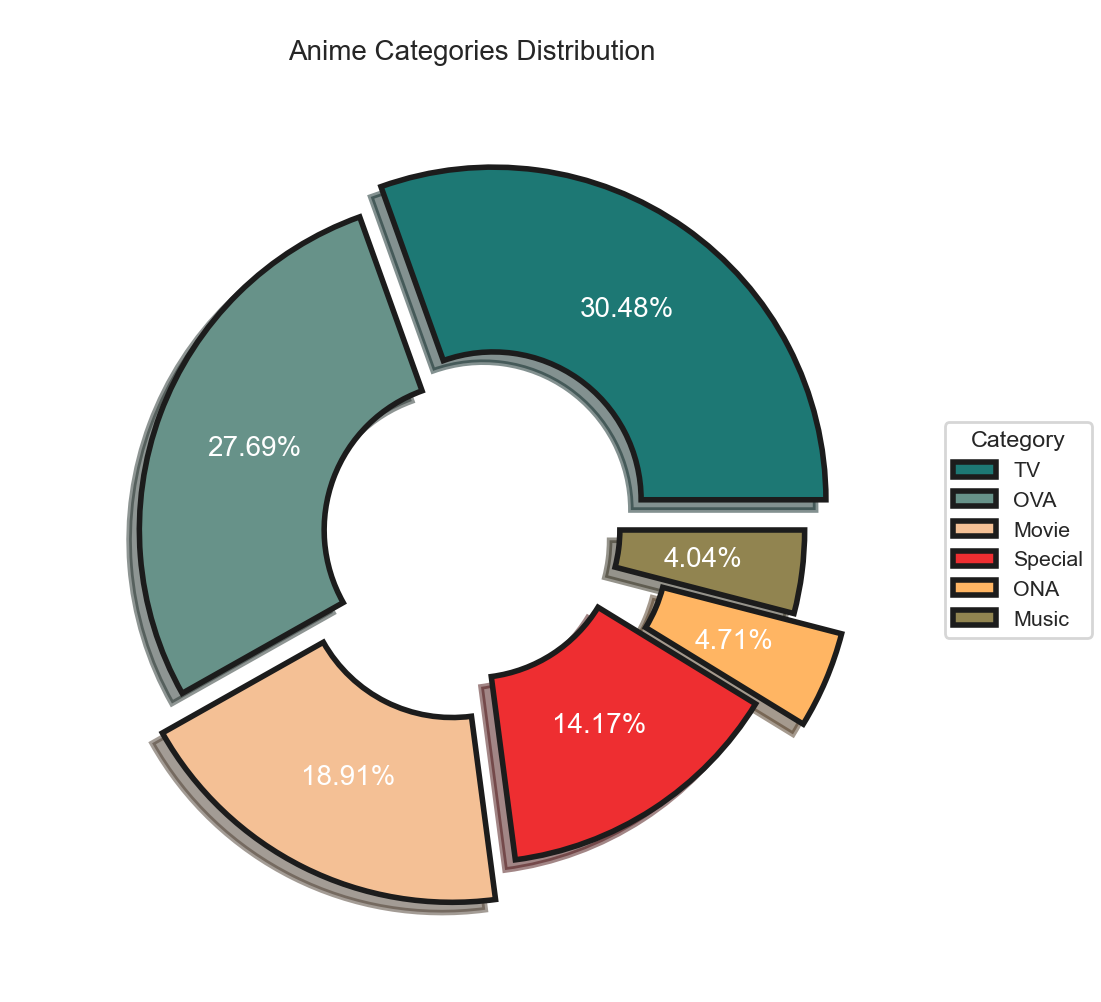

In [85]:
plt.subplots(figsize=(12, 12))

labels = "TV","OVA","Movie","Special","ONA","Music"
size = 0.5

wedges, texts, autotexts = plt.pie([len(top_anime_temp[top_anime_temp["type"]=="TV"]["type"]),
                                    len(top_anime_temp[top_anime_temp["type"]=="OVA"]["type"]),
                                    len(top_anime_temp[top_anime_temp["type"]=="Movie"]["type"]),
                                    len(top_anime_temp[top_anime_temp["type"]=="Special"]["type"]),
                                    len(top_anime_temp[top_anime_temp["type"]=="ONA"]["type"]),
                                    len(top_anime_temp[top_anime_temp["type"]=="Music"]["type"])],
                                    explode = (0.10,0,0.12,0,0.14,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.7,
                                    radius=.9, 
                                    colors = palette, 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "#1c1c1c", 
                                    linewidth = 4),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nAnime Categories Distribution",fontsize=20)
plt.show()

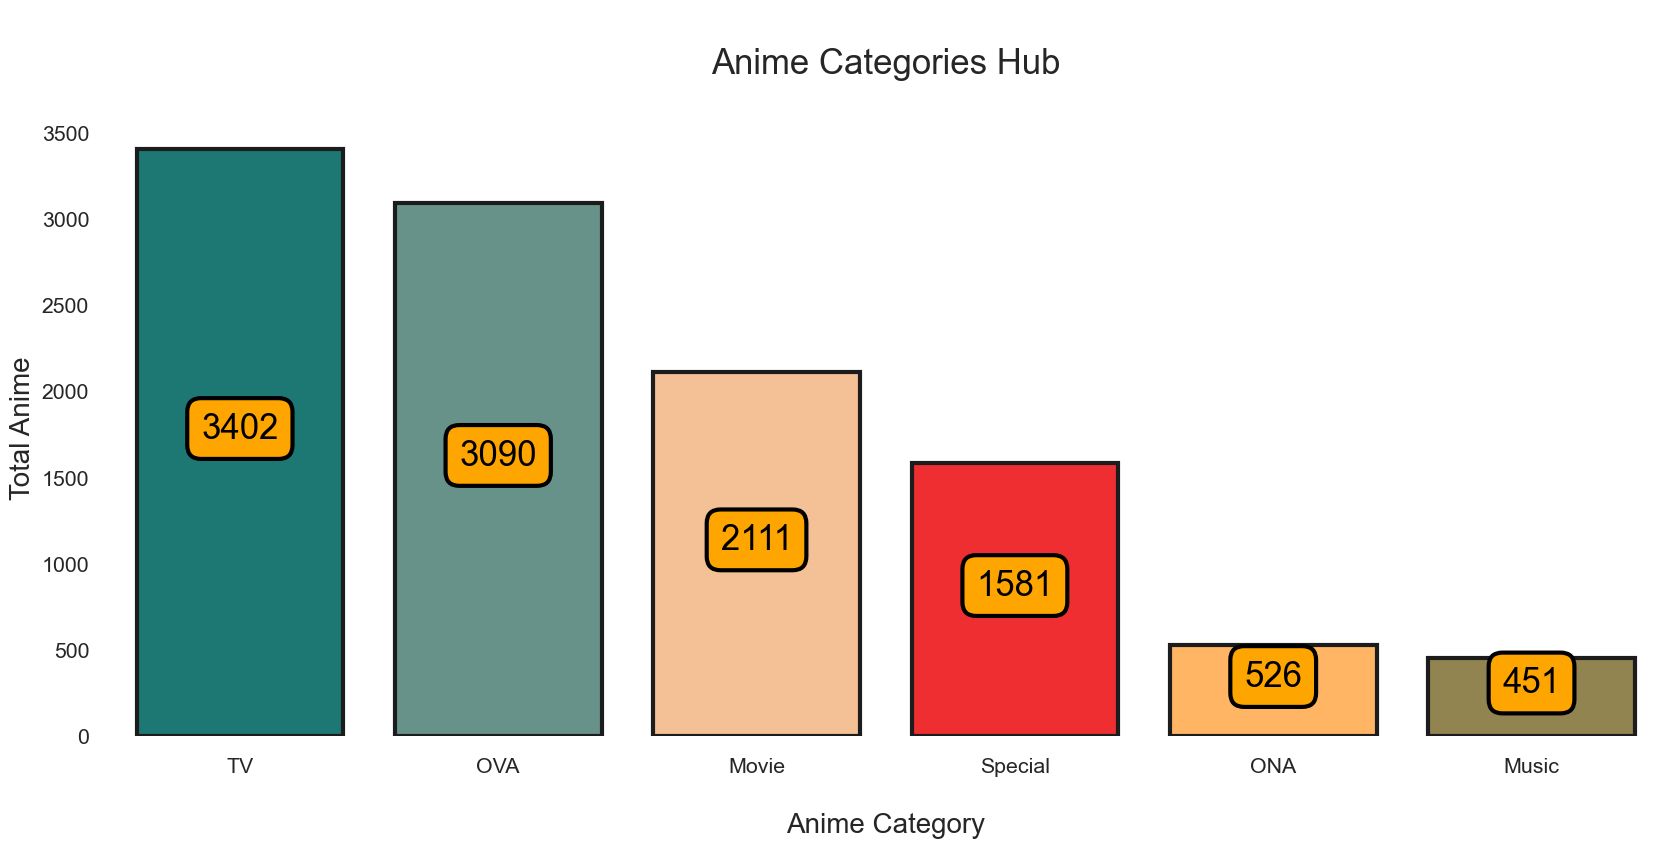

In [86]:
plt.subplots(figsize=(20,8))
p = sns.countplot(x = top_anime_temp["type"], order = top_anime_temp["type"].value_counts().index, palette = palette, saturation = 1, edgecolor = "#1c1c1c", linewidth = 3)
p.axes.set_title("\nAnime Categories Hub\n" ,fontsize = 25)
plt.ylabel("Total Anime" ,fontsize = 20)
plt.xlabel("\nAnime Category" ,fontsize = 20)
plt.xticks(rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 25,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "black", "linewidth" : 3, "alpha": 1})

sns.despine(left = True, bottom = True)
plt.show()

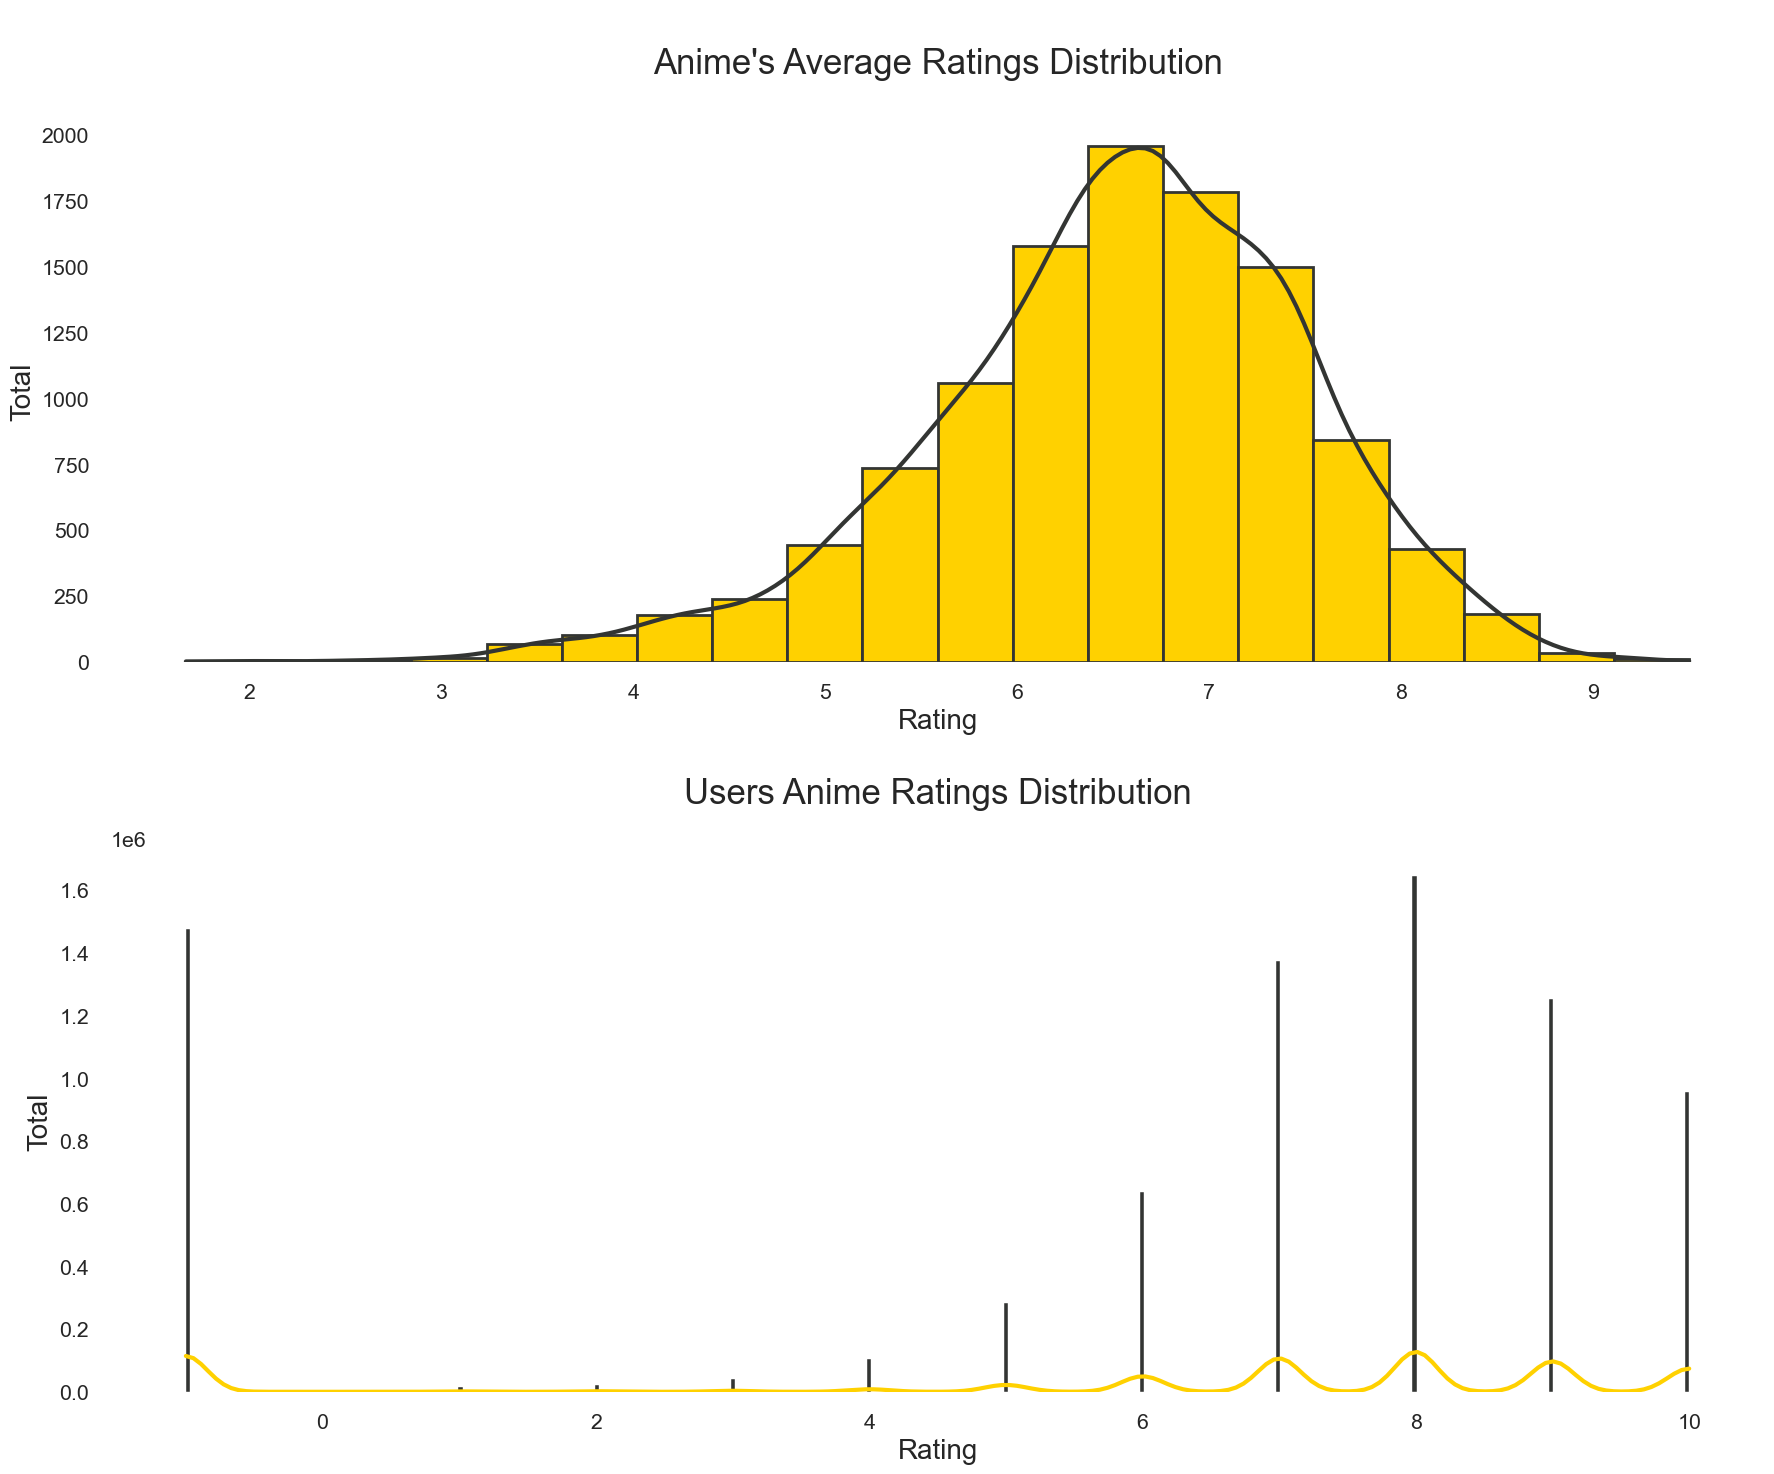

In [91]:
top_anime_temp2 = top_anime.sort_values(["rating"],ascending=False)

_, axs = plt.subplots(2,1,figsize=(20,16),sharex=False,sharey=False)
plt.tight_layout(pad=6.0)

sns.histplot(top_anime_temp2["rating"],color=palette[11],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[12])
axs[0].set_title("\nAnime's Average Ratings Distribution\n",fontsize = 25)
axs[0].set_xlabel("Rating\n", fontsize = 20)
axs[0].set_ylabel("Total", fontsize = 20)

sns.histplot(fulldata_df["user_rating"],color=palette[12],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True)
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\n\n\nUsers Anime Ratings Distribution\n",fontsize = 25)
axs[1].set_xlabel("Rating", fontsize = 20)
axs[1].set_ylabel("Total", fontsize = 20)

sns.despine(left=True, bottom=True)
plt.show()

Insights:
Anime ratings mostly 5.5 - 8.0
User ratings motly around 6.0 to 10.0
Mode of user ratings distribution around 7.0 to 8.0
Both distributions are left skewed - A left-skewed (or negatively skewed) distribution means that the tail on the left side (lower values) is longer than the right side. This indicates that most of the data points are concentrated towards the higher values, but there are some smaller values that pull the mean to the left.
User rating of -1 is an outlierin user ratings which can be discarded.

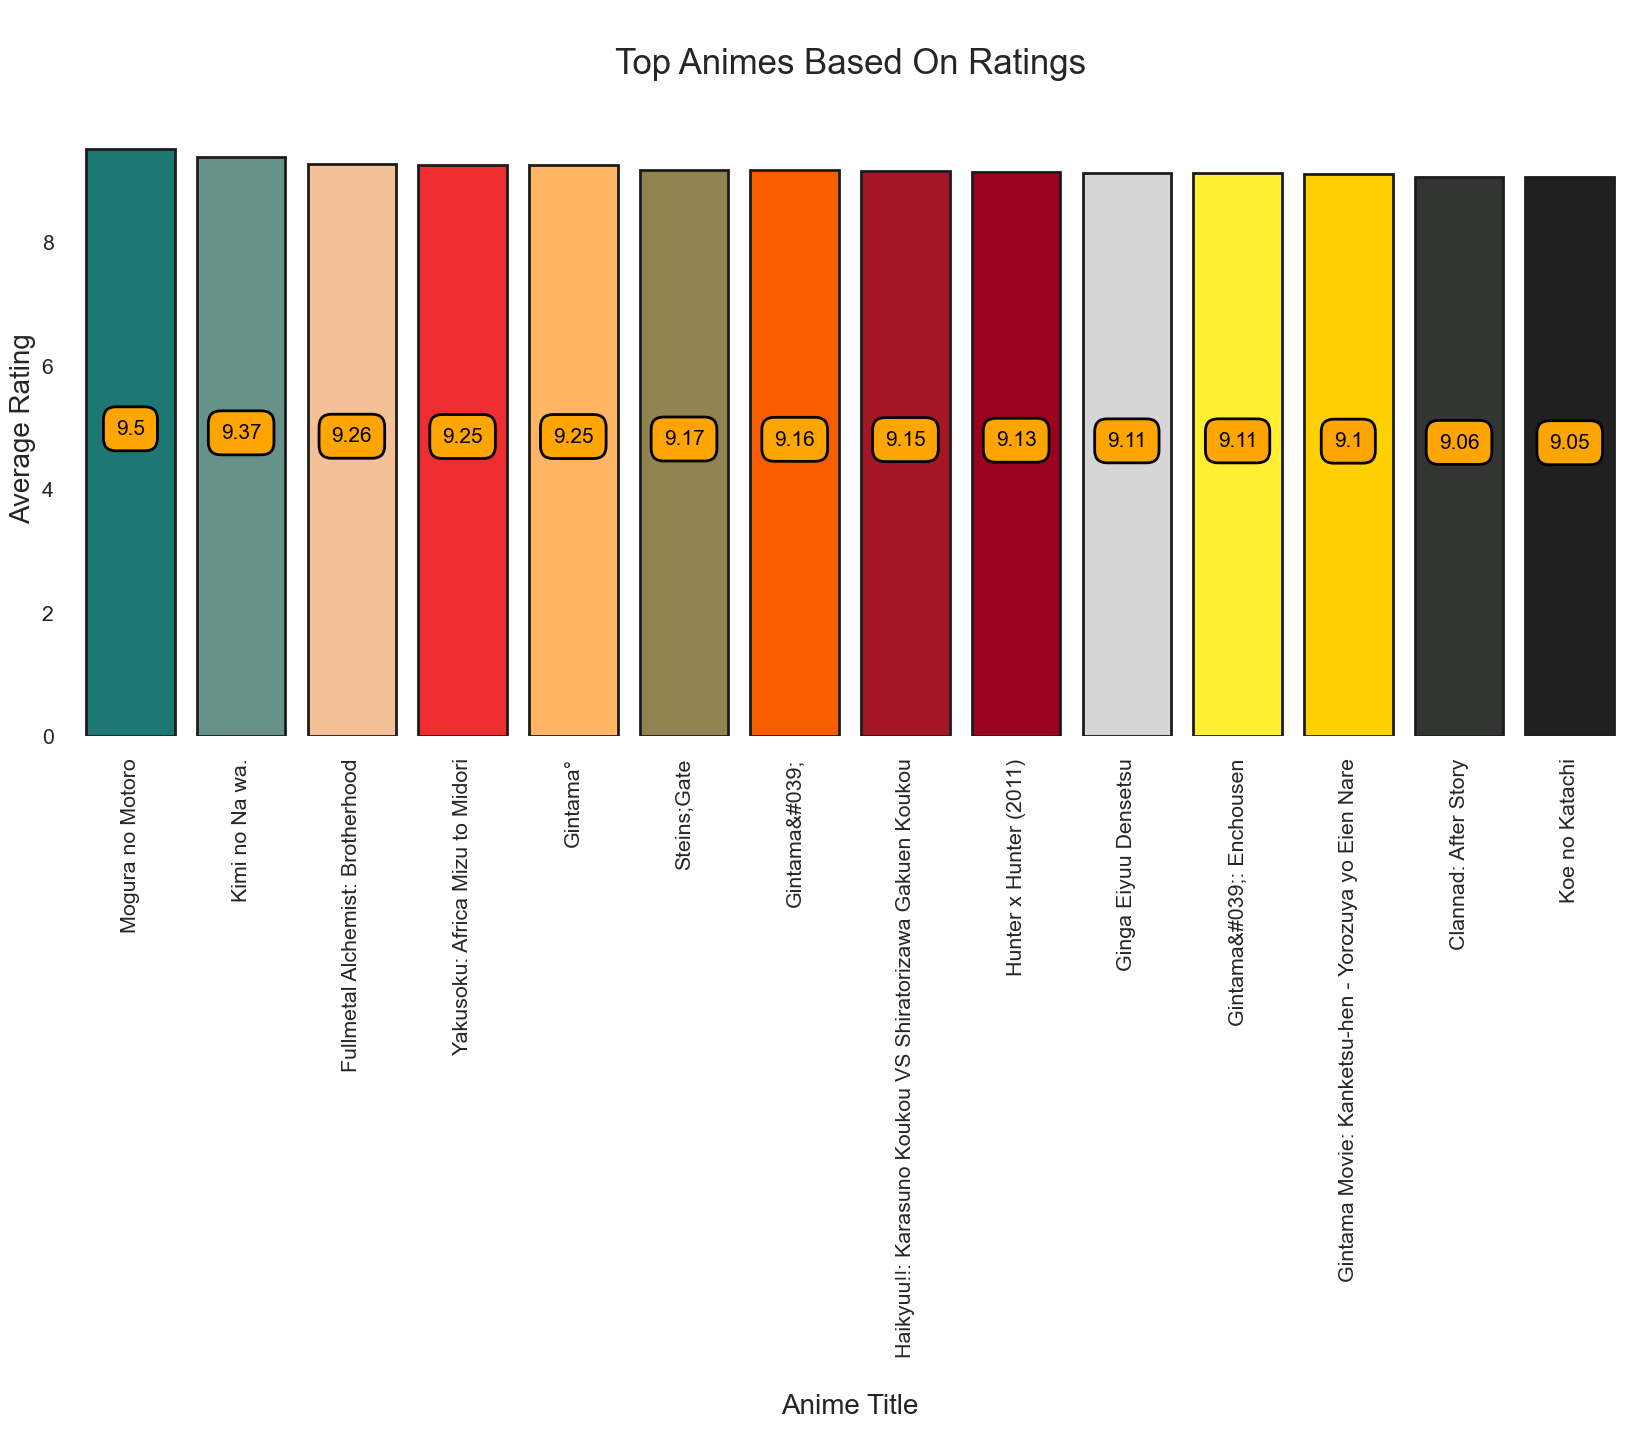

In [93]:
plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_anime_temp2["name"][:14],y=top_anime_temp2["rating"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2, order=top_anime_temp2["name"][:14])
p.axes.set_title("\nTop Animes Based On Ratings\n",fontsize = 25)
plt.ylabel("Average Rating",fontsize = 20)
plt.xlabel("\nAnime Title",fontsize = 20)
# plt.yscale("log")
plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 15,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

Ratings in OVA category


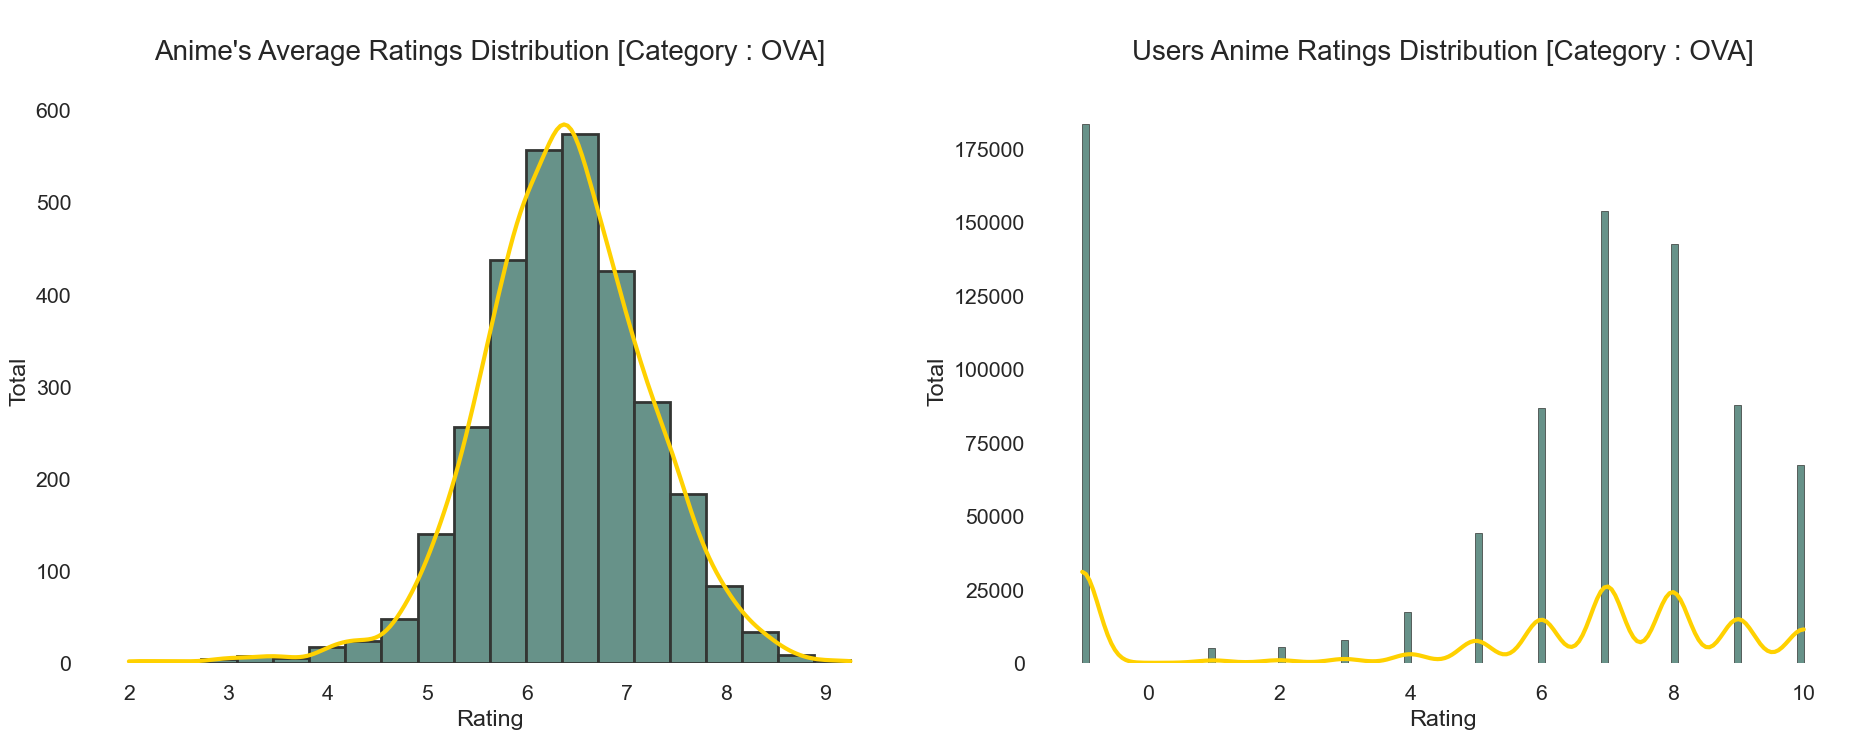

In [97]:
print("Ratings in OVA category")
_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="OVA"]["rating"],color=palette[1],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : OVA]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata_df[fulldata_df["type"]=="OVA"]["user_rating"],color=palette[1],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : OVA]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

Ratings in Movie category


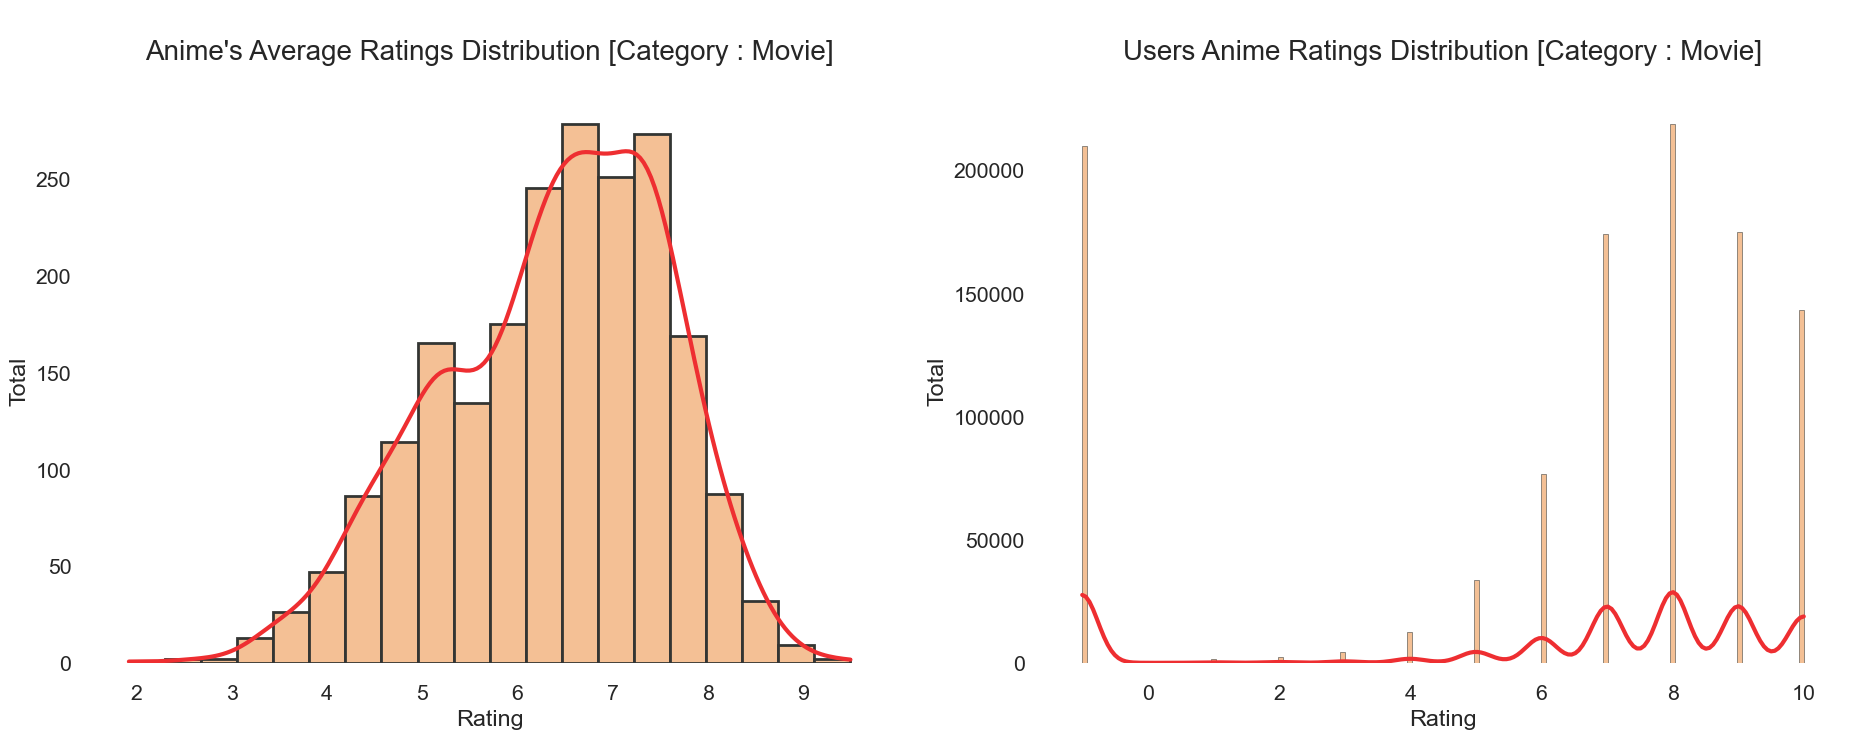

In [99]:
print("Ratings in Movie category")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="Movie"]["rating"],color=palette[2],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[3])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Movie]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata_df[fulldata_df["type"]=="Movie"]["user_rating"],color=palette[2],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[3])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Movie]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

Ratings  of special category


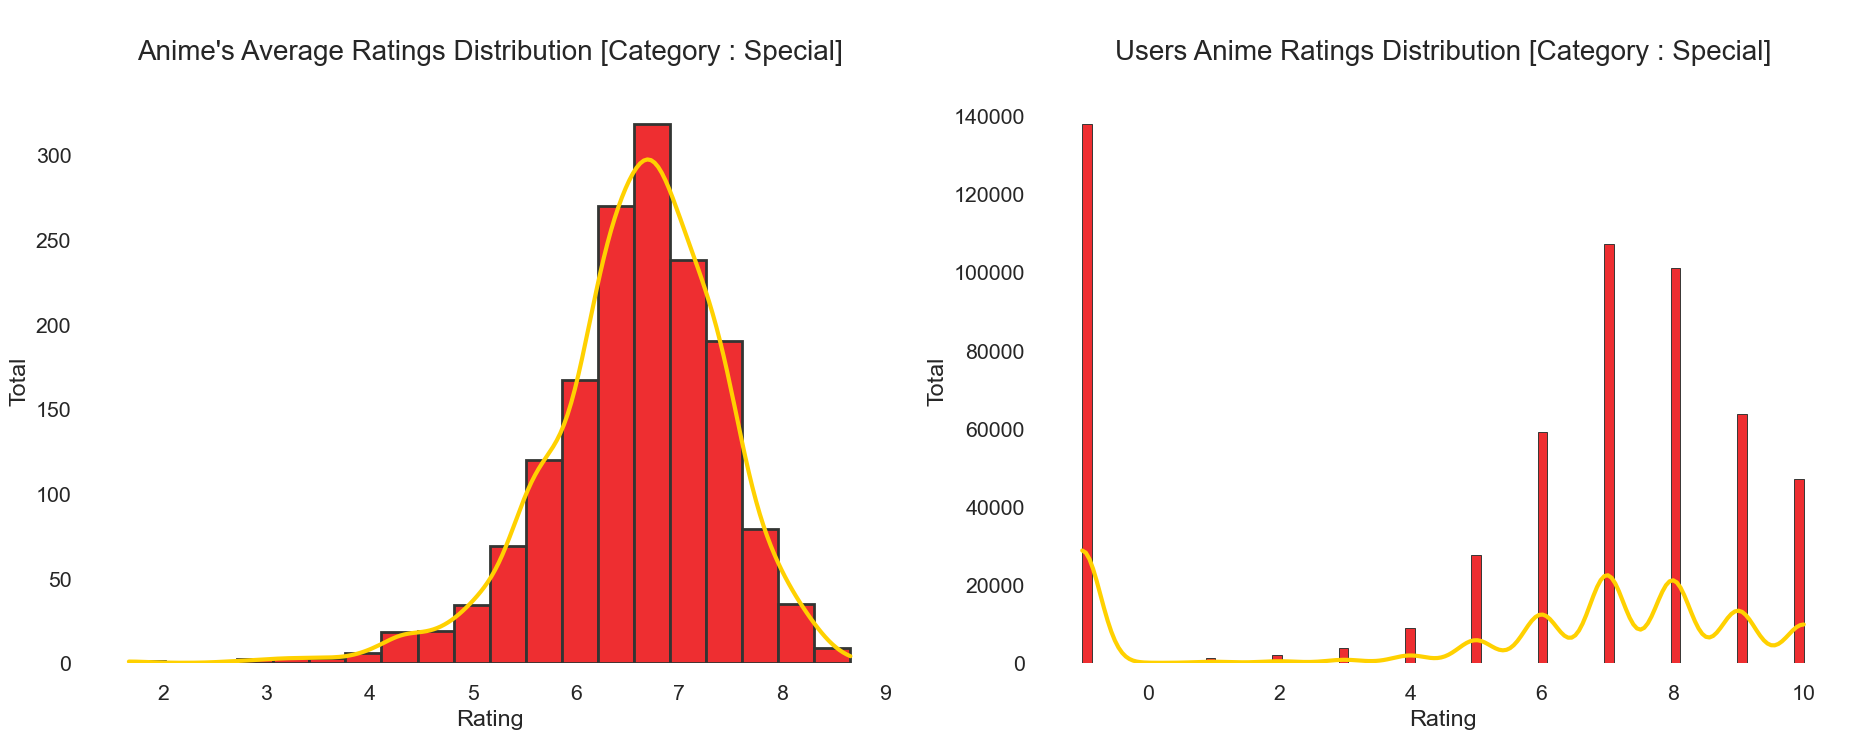

In [100]:
print("Ratings  of special category")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="Special"]["rating"],color=palette[3],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Special]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata_df[fulldata_df["type"]=="Special"]["user_rating"],color=palette[3],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Special]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

Ratings of ONA category


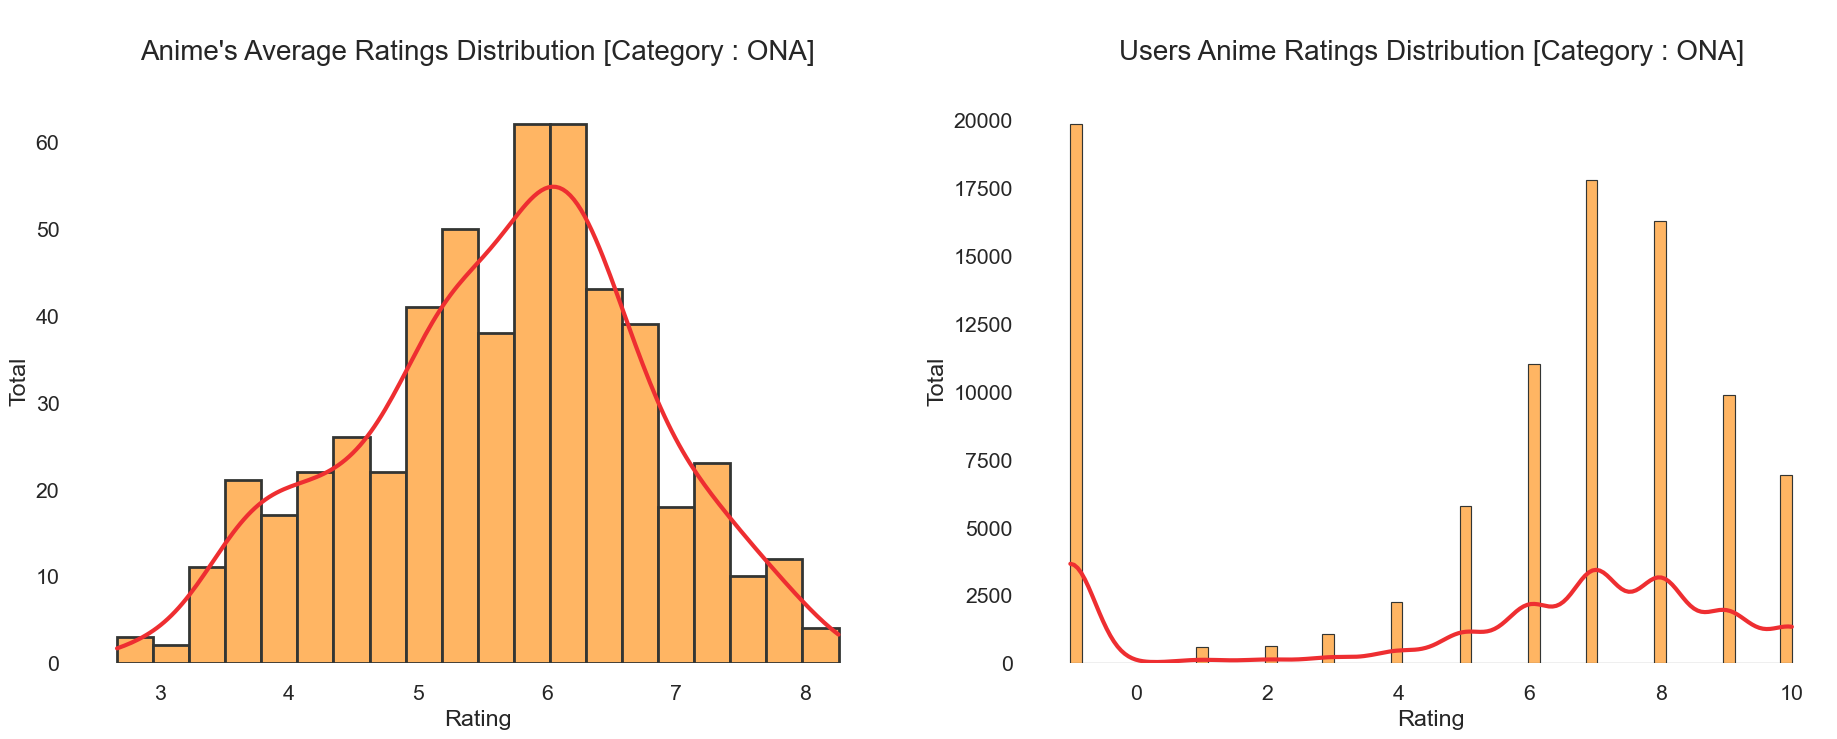

In [101]:
print("Ratings of ONA category")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="ONA"]["rating"],color=palette[4],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[3])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : ONA]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata_df[fulldata_df["type"]=="ONA"]["user_rating"],color=palette[4],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[3])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : ONA]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

Ratings of Music category


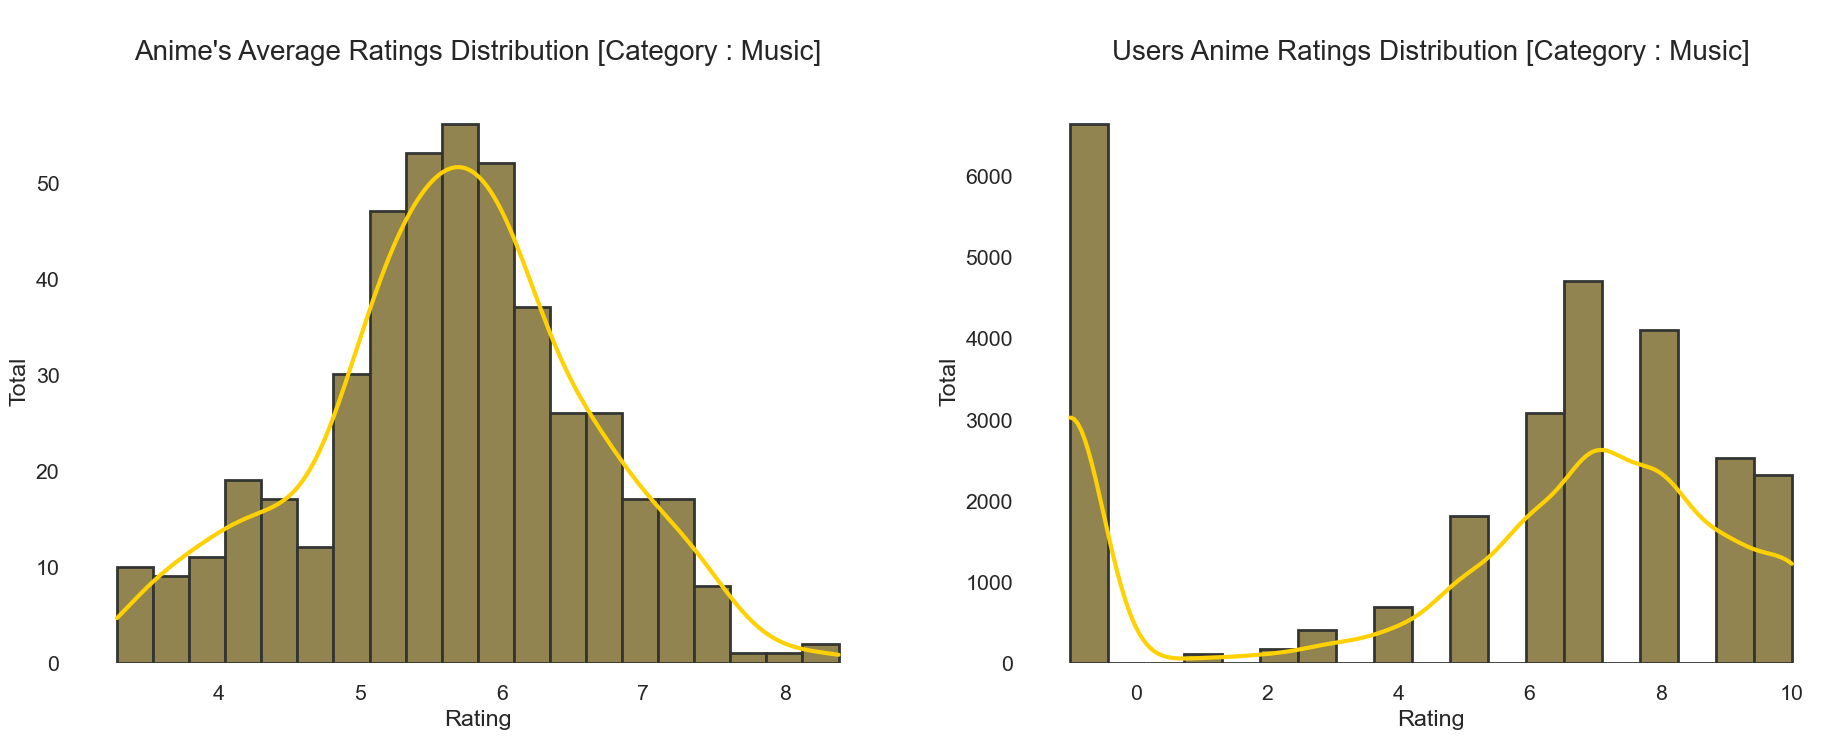

In [102]:
print("Ratings of Music category")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="Music"]["rating"],color=palette[5],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Music]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata_df[fulldata_df["type"]=="Music"]["user_rating"],color=palette[5],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Music]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

Anime Genres

In [105]:
top_anime_genre_list=top_anime[['genre']]
top_anime_genre_list['genre']=top_anime_genre_list['genre'].str.split(', | , | ,')#regex
top_anime_genre_list=top_anime_genre_list.explode('genre')#splits the multi-genre into seperate rows
top_anime_genre_list["genre"] = top_anime_genre_list["genre"].str.title()

print(f'Total unique genres are {len(top_anime_genre_list["genre"].unique())}')
print(f'Occurances of unique genres :')
top_anime_genre_list["genre"].value_counts().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Total unique genres are 43
Occurances of unique genres :


genre,Comedy,Action,Adventure,Fantasy,Sci-Fi,Drama,Shounen,Romance,Kids,School,Slice Of Life,Hentai,Supernatural,Mecha,Music,Historical,Magic,Ecchi,Shoujo,Seinen,Sports,Mystery,Super Power,Military,Parody,Space,Horror,Harem,Demons,Martial Arts,Psychological,Dementia,Police,Game,Samurai,Vampire,Thriller,Cars,Shounen Ai,Shoujo Ai,Josei,Yuri,Yaoi
count,4271,2686,2197,2107,1981,1857,1636,1420,1306,1135,1115,1095,964,910,763,719,712,619,576,513,508,472,433,410,379,362,348,306,279,246,221,200,183,161,142,97,84,65,61,54,52,41,37


let's explore how genre's wordcloud looks like



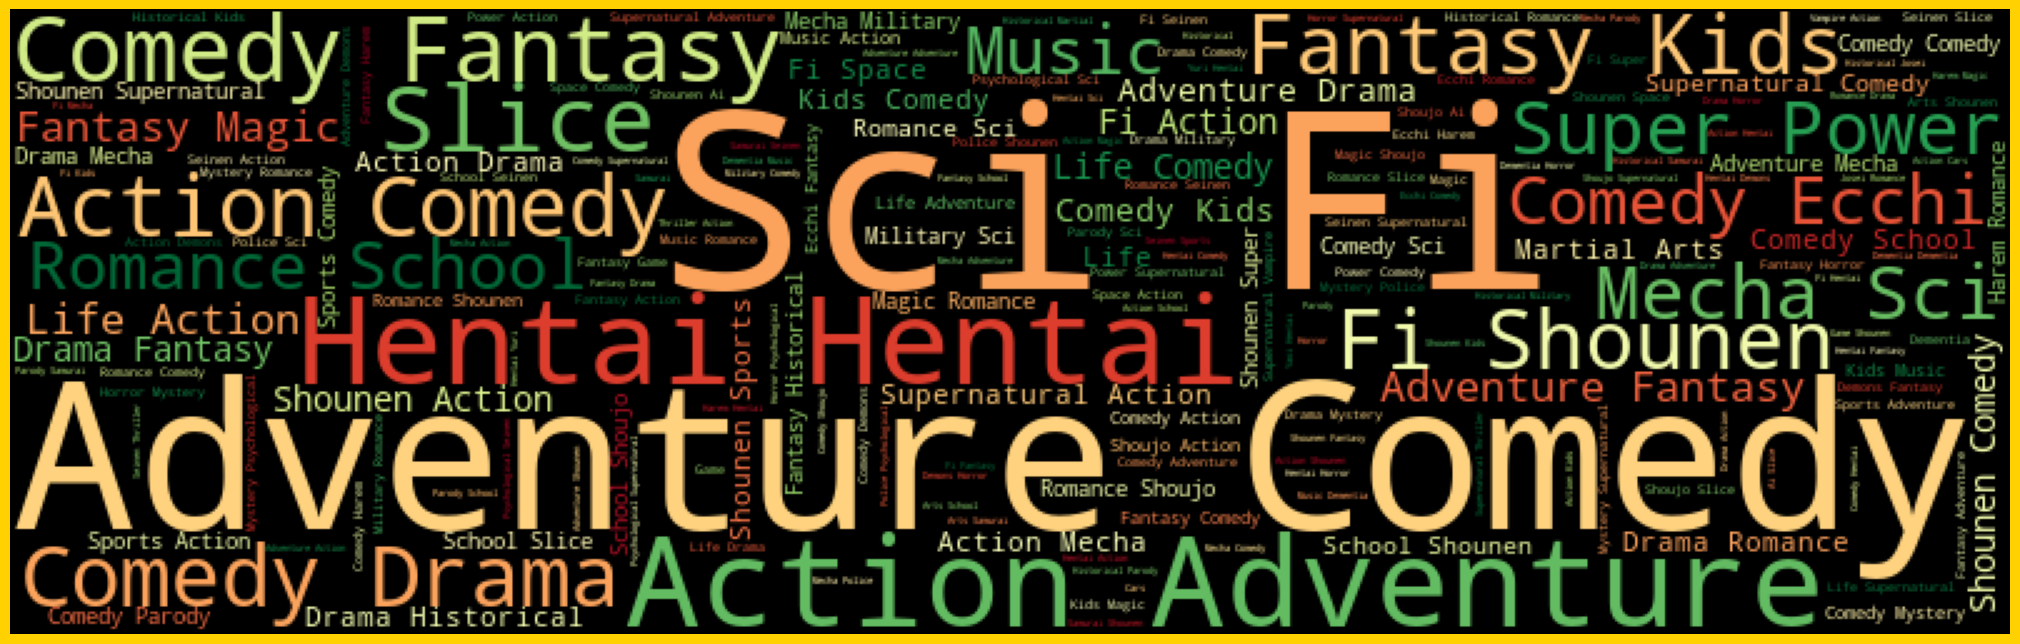

In [107]:
!pip install wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 250, background_color ="black",colormap ="RdYlGn",
                      max_font_size=100, stopwords =None,repeat= True).generate(top_anime["genre"].str.cat(sep=", | , | ,"))

print("let's explore how genre's wordcloud looks like\n")
plt.figure(figsize = (20, 8),facecolor = "#ffd100") 
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.tight_layout(pad = 0) 
plt.show()

Data Preprocessing

In [112]:
data=fulldata_df.copy()
data['user_rating'].replace(to_replace=-1, value=np.nan, inplace=True)
data=data.dropna(axis=0)
print("Null values after final pr eprocessing")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Null values after final preprocessing


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,0,0,0,0,0,0,0,0,0


There are a lot of users who might've rated only once, even if they have rated for 5 animes, it cannot be considered a valuable record for recommendation. So we will consider minimum 50 ratings by a user as a threshold value.

In [113]:
selected_users = data['user_id'].value_counts()#takes the number of ratings given by each user_id. WE only need the ones greater than 50
data=data[data['user_id'].isin(selected_users[selected_users>=50].index)]#filters out the user_ids from data where the count is <50

We will create a pivot table with the rows as titles and columns as user_id. This will help create a sparse matrix which will help find cosine similarity.
What is the use of a pivot table - A pivot table is a data structure that summarizes and reorganizes data in a tabular format. It allows you to group, aggregate, and analyze data efficiently. In Python, we typically use pandas’ .pivot_table().
In a recommender system, we need user-interaction matrix to analyze relationships b/w users and anime. We need to create a table b/w user_id as columns and anime as rows and ratings as the values. Thiis gives a relation b'w users and anime.

In [115]:
data_pivot_temp = data.pivot_table(index='name', columns='user_id', values='user_rating').fillna(0)
data_pivot_temp.head()

user_id,3,5,7,11,14,17,21,23,24,27,...,73495,73499,73500,73501,73502,73503,73504,73507,73510,73515
name,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
&quot;Eiji&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We also have manu japanese or special characters symbols in anime names. We will remove those using a function

In [116]:
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)

    return text
data['name']=data['name'].apply(text_cleaning)

In [117]:
data_pivot = data.pivot_table(index="name",
                              columns="user_id",
                              values="user_rating").fillna(0)
print("After Cleaning the animes names, let's see how it looks like.")
data_pivot.head()

After Cleaning the animes names, let's see how it looks like.


user_id,3,5,7,11,14,17,21,23,24,27,...,73495,73499,73500,73501,73502,73503,73504,73507,73510,73515
name,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009 Re:Cyborg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1: RandB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Collaborative filtering
In collaborative filtering, we predict user preferences based on past preferences of similar users or similar items.
There are two types of CF - item-based and user-based.
Item-based CF - Here, recommendations are made based on how the items are rated. Recommends items taht are similar to what the user has liked. If People who like itemX also liked itemY, recommend itemY.
User-based CF - Find similar users based on rating patterns. Recommend what similar users has rated. If A nad B like itemX and B also liked itemY, then recommend itemY to A.

Item-based CF using kNN and cosine similarity

In [121]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [156]:
data_matrix = csr_matrix(data_pivot.values)
model_knn = NearestNeighbors(metric='cosine', 
                             algorithm='brute')
model_knn.fit(data_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [158]:
query_no = np.random.choice(data_pivot.shape[0])#getting random anime to find recommendations
selected_anime = data_pivot.index[query_no]
anime_genre = anime_df.loc[anime_df['name'] == selected_anime, 'genre'].values
print(f'We will find recommendation for {query_no} no anime witch is {data_pivot.index[query_no]} which is of genre {anime_genre[0]}')
distances,indices = model_knn.kneighbors(data_pivot.iloc[query_no,:].values.reshape(1,-1), n_neighbors=6)
#print(f'Indices of recommended anime = {indices} and distances are ={distances}')

We will find recommendation for 8969 no anime with is Toushou Daimos which is of genre Adventure, Drama, Mecha, Romance, Sci-Fi, Shounen


In [159]:
no,name,distance,rating,genre=[],[],[],[],[]
for i in range(0, len(distances.flatten())):
    if i==0:
        print(f'Recommendations for {data_pivot.index[query_no]} viewers: \n')
    else:
        no.append(i)
        name.append(data_pivot.index[indices.flatten()[i]])
        distance.append(distances.flatten()[i])
        rating.append(*anime_df[anime_df['name']==data_pivot.index[indices.flatten()[i]]]['rating'].values)
        anime_genre_t = anime_df.loc[anime_df['name']==data_pivot.index[query_no],'genre'].values
        genre.append(anime_genre_t[0])

dic={'No':no,'Anime Name':name,'Rating':rating,'Genre':genre}
recommendation=pd.DataFrame(data=dic)
recommendation.set_index("No", inplace=True)
recommendation.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Recommendations for Toushou Daimos viewers: 



,Anime Name,Rating,Genre
No,,,
1,Chou Denji Machine Voltes V,7.540000,"Adventure, Drama, Mecha, Romance, Sci-Fi, Shounen"
2,Time Bokan Series: Yatterman,6.760000,"Adventure, Drama, Mecha, Romance, Sci-Fi, Shounen"
3,Time Bokan Series: Yattodetaman,6.560000,"Adventure, Drama, Mecha, Romance, Sci-Fi, Shounen"
4,Mahoutsukai Sally,6.490000,"Adventure, Drama, Mecha, Romance, Sci-Fi, Shounen"
5,Mojakou,7.340000,"Adventure, Drama, Mecha, Romance, Sci-Fi, Shounen"


In [153]:
anime_genre=data.query("name=='Weekender Girl'")['genre'].values
print(anime_genre[0])

Music


User Based CF

In [154]:
user_anime_table = data_pivot.T#we take transpose of item-based pivot table for user based
user_anime_table.head()

name,0,001,009 Re:Cyborg,009-1,009-1: RandB,00:08,07-Ghost,1+2=Paradise,100%,100-man-nen Chikyuu no Tabi: Bander Book,...,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯
user_id,,,,,,,,,,,,,,,,,,,,,
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
user_sparse_matrix = csr_matrix(user_anime_table.values)
user_knn = NearestNeighbors(metric='cosine', algorithm='brute')
user_knn.fit(user_sparse_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [186]:
query_no = np.random.choice(user_anime_table.shape[0])#getting random anime to find recommendations
print(f'We will find recommendation for {query_no} no user which is {user_anime_table.index[query_no]}')
distances,indices = user_knn.kneighbors(user_anime_table.iloc[query_no,:].values.reshape(1,-1), n_neighbors=6)

We will find recommendation for 28613 no user which is 63343


In [187]:
similar_user = indices.flatten()[1:]#excluding the first index
recommended_anime=[]

for user_idx in similar_users:
    similar_user_id=user_anime_table.index[user_idx]
    top_rated_anime = data[data['user_id']==similar_user_id].sort_values(by='rating',ascending=False)['name'].values[:5]
    recommended_anime.extend(top_rated_anime)

recommended_anime=list(set(recommended_anime))
print(f'Recomemended anime for {user_anime_table.index[query_no]} is {recommended_anime}')

Recomemended anime for 63343 is ['Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen', 'Sen to Chihiro no Kamikakushi', 'Hajime no Ippo', 'Shigatsu wa Kimi no Uso', 'One Punch Man', 'Steins;Gate', 'Gintama°', 'Fate/Zero 2nd Season', 'Code Geass: Hangyaku no Lelouch', 'Fullmetal Alchemist: Brotherhood', 'Cowboy Bebop', 'Gintama', 'Hunter x Hunter (2011)', 'Code Geass: Hangyaku no Lelouch R2', 'Gintama: Enchousen']


Content Based Recommender

In content based filtering, we refer to content features rather than user data. We refer to features of the content(here for anime, we look genre, synopsis etc) to make recommendations. We convert these features to numerical vectors and find the similarity b/w the vectors using cosine similarity of TF-IDF scores.
TF-IDF(Term Frequency-Inverse Document Frequency) is a numerical representation of text that highlights important words while reducing the impact of frequently occuring words.TF - measures hoe often a word appears in document. IDF - Reduces the weight of wrds that appear frequently across all documents.
Higher TF-IDF -> More important word
Lower TF-IDF -> Less relevant/common word

Using TF-IDF and sigmoid-kernel similarity

In [198]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(min_df=3, #ignore words which appear in fewer than 3 documents
                      max_features=None, #use all features-no limit on vocabulary size
                      strip_accents="unicode", #normalize texts by removing accents
                      analyzer="word",#tokenize based on words
                      token_pattern=r"\w{1,}",#match words of length 1 or more (avoids removing short words)
                      ngram_range=(1, 3),#extract unigrams, bigrams, and trigrams (better similarity matching)
                      stop_words = "english")#remove common English stop words (e.g., "the", "and", "is")

rec_data = fulldata_df.copy()
rec_data.drop_duplicates(subset ="name", keep = "first", inplace = True)
rec_data.reset_index(drop = True, inplace = True)#ensure index starts from 0 after dropping duplicates-cleaner data
genres = rec_data["genre"].str.split(", | , | ,").astype(str)#converts genre strings into list and converts it back to str so TF-IDF can process it
#Eg: "Action, Adventure, Drama" becomes "['Action', 'Adventure', 'Drama']"
tfv_matrix = tfv.fit_transform(genres)

In [201]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix)#computing sigmoid kernel

rec_indices = pd.Series(rec_data.index, 
                        index = rec_data["name"]).drop_duplicates()#creates a mapping b/w anime name and row index in dataframe


# Recommendation Function
def give_recommendation(title, sig = sig):
    
    idx = rec_indices[title]#getting index corresponding to original_title
    anime_genre = rec_data.loc[rec_data['name']==title, 'genre'].values[0]

    sig_score = list(enumerate(sig[idx]))  # Getting pairwsie similarity scores 
    sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)
    sig_score = sig_score[1:11]#removing the first entry because it is the given anime itself
    anime_indices = [i[0] for i in sig_score]
     
    # Top 10 most similar movies
    rec_dic = {"No" : range(1,11), 
               "Anime Name" : anime_df["name"].iloc[anime_indices].values,
               "Genre" : anime_df['genre'].iloc[anime_indices].values,
               "Rating" : anime_df["rating"].iloc[anime_indices].values}
    
    dataframe = pd.DataFrame(data = rec_dic)
    dataframe.set_index("No", inplace = True)
    
    print(f"Recommendations for {title} viewers which is of the genre {anime_genre} :\n")
    
    return dataframe.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

In [202]:
give_recommendation('Naruto')

Recommendations for Naruto viewers which is of the genre Action, Comedy, Martial Arts, Shounen, Super Power :



,Anime Name,Genre,Rating
No,,,
1,To LOVE-Ru Darkness OVA,"Comedy, Ecchi, Harem, Romance, School, Sci-Fi, Shounen",7.820000
2,Hanbun no Tsuki ga Noboru Sora,"Comedy, Drama, Romance",7.690000
3,Mai-HiME,"Action, Comedy, Drama, Fantasy, Magic, Mecha, Romance, School, Shoujo Ai",7.590000
4,Doraemon Movie 28: Nobita to Midori no Kyojin Den,"Adventure, Comedy, Fantasy, Kids, Shounen",7.540000
5,Rurouni Kenshin Special,"Action, Historical, Romance, Samurai",7.510000
6,Pikmin Short Movies,"Fantasy, Kids",7.270000
7,Deadman Wonderland OVA,"Action, Horror, Sci-Fi",7.120000
8,Anata mo Robot ni Nareru feat. Kamome Jidou Gasshoudan,Music,5.120000
9,Shinpi no Hou,"Adventure, Supernatural",5.370000


In [203]:
give_recommendation('Death Note')

Recommendations for Death Note viewers which is of the genre Mystery, Police, Psychological, Supernatural, Thriller :



,Anime Name,Genre,Rating
No,,,
1,Hachimitsu to Clover Specials,"Comedy, Drama, Josei, Romance, Slice of Life",7.850000
2,Trapp Ikka Monogatari,"Drama, Historical, Music, Romance",7.750000
3,Major S1,"Comedy, Drama, Shounen, Sports",8.420000
4,Hakkenden: Touhou Hakken Ibun,"Action, Fantasy, Shoujo, Supernatural",7.570000
5,Ushi Atama,Dementia,4.870000
6,ef: A Tale of Melodies.,"Drama, Mystery, Romance, Supernatural",8.180000
7,Saki Achiga-hen: Episode of Side-A Specials,"Game, School, Slice of Life",7.630000
8,One Piece: Oounabara ni Hirake! Dekkai Dekkai Chichi no Yume!,"Action, Adventure, Comedy, Fantasy, Shounen, Super Power",7.430000
9,Kizumonogatari II: Nekketsu-hen,"Action, Mystery, Supernatural, Vampire",8.730000


In [205]:
give_recommendation('Mogura no Motoro')

Recommendations for Mogura no Motoro viewers which is of the genre Slice of Life :



,Anime Name,Genre,Rating
No,,,
1,Cat's Eye,"Action, Adventure, Comedy, Mystery, Romance",7.210000
2,Black Jack ONA,Drama,6.820000
3,Ketsuekigata-kun!,Comedy,6.790000
4,Puni Puni☆Poemii,"Comedy, Magic, Sci-Fi, Shounen",6.680000
5,Arrow Emblem Grand Prix no Taka,"Cars, Drama, Sports",6.660000
6,Redial,Music,6.660000
7,Persona 4 the Golden Animation: Thank you Mr. Accomplice,"Adventure, Drama, Mystery, Supernatural",6.610000
8,Shin-Men,"Action, Comedy, Kids",6.540000
9,Human Crossing,"Drama, Slice of Life, Sports",6.530000


Using Cosine Similarity

In [211]:
from sklearn.metrics.pairwise import cosine_similarity
sim_matrix = cosine_similarity(tfv_matrix)

# Recommendation Function
def give_recommendation_cosine(title):
    
    idx = rec_data[rec_data['name']==title].index[0]
    anime_genre = rec_data.loc[rec_data['name']==title, 'genre'].values[0]
    sim_scores = list(enumerate(sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]
    anime_indices = [i[0] for i in sim_scores]

    # Top 10 most similar movies
    rec_dic = {"No" : range(1,6), 
               "Anime Name" : rec_data["name"].iloc[anime_indices].values,
               "Genre" : rec_data['genre'].iloc[anime_indices].values,
               "Rating" : rec_data["rating"].iloc[anime_indices].values}
    
    dataframe = pd.DataFrame(data = rec_dic)
    dataframe.set_index("No", inplace = True)
    
    print(f"Recommendations for {title} viewers which is of the genre {anime_genre} :\n")
    
    return dataframe.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

In [212]:
give_recommendation_cosine('Naruto')

Recommendations for Naruto viewers which is of the genre Action, Comedy, Martial Arts, Shounen, Super Power :



,Anime Name,Genre,Rating
No,,,
1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super Power",7.810000
2,Boruto: Naruto the Movie - Naruto ga Hokage ni Natta Hi,"Action, Comedy, Martial Arts, Shounen, Super Power",7.680000
3,Naruto x UT,"Action, Comedy, Martial Arts, Shounen, Super Power",7.580000
4,Naruto: Shippuuden Movie 4 - The Lost Tower,"Action, Comedy, Martial Arts, Shounen, Super Power",7.530000
5,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsugu Mono,"Action, Comedy, Martial Arts, Shounen, Super Power",7.500000


In [213]:
give_recommendation_cosine('Death Note')

Recommendations for Death Note viewers which is of the genre Mystery, Police, Psychological, Supernatural, Thriller :



,Anime Name,Genre,Rating
No,,,
1,Death Note Rewrite,"Mystery, Police, Psychological, Supernatural, Thriller",7.840000
2,Mousou Dairinin,"Drama, Mystery, Police, Psychological, Supernatural, Thriller",7.740000
3,Higurashi no Naku Koro ni Kai,"Mystery, Psychological, Supernatural, Thriller",8.410000
4,Higurashi no Naku Koro ni Rei,"Comedy, Mystery, Psychological, Supernatural, Thriller",7.560000
5,Bloody Night,"Horror, Psychological, Supernatural, Thriller",4.260000


In [214]:
give_recommendation_cosine('Mogura no Motoro')

Recommendations for Mogura no Motoro viewers which is of the genre Slice of Life :



,Anime Name,Genre,Rating
No,,,
1,Fantastic Children Special,Slice of Life,7.200000
2,Natsu-iro Kiseki: 15-kaime no Natsuyasumi,Slice of Life,6.810000
3,Toki wa Meguru: Tokyo Station,Slice of Life,6.780000
4,Mottainai,Slice of Life,6.660000
5,Omoi no Kakera,Slice of Life,6.650000


Experiment - Using BERT4Rec for recommendations

Constraint - no user interaction data. Might have to fabricate user interaction data from animes users have rated previously.

In [215]:
pip install transformers datasets torch

   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   --------------------- ------------------ 5.2/9.7 MB 29.0 MB/s eta 0:00:01
   ---------------------------------------- 9.7/9.7 MB 25.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 6.2/6.2 MB 31.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/25.3 MB ? eta -:--:--
   ------------- -------------------------- 8.4/25.3 MB 43.2 MB/s eta 0:00:01
   --------------------------- ------------ 17.6/25.3 MB 44.2 MB/s eta 0:00:01
   ---------------------------------------  25.2/25.3 MB 44.2 MB/s eta 0:00:01
   ---------------------------------------- 25.3/25.3 MB 39.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 2.4/2.4 MB 22.6 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.3
    Uninstalling sympy-1

In [216]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [218]:
rating_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [219]:
#sort interacitions chronologically  for sequential learning
rating_df = rating_df.sort_values(by=['user_id','anime_id'])
rating_df['anime_id']=rating_df['anime_id'].astype(str)
user_sequences = rating_df.groupby("user_id")["anime_id"].apply(list)#group by user to create sequences
print(user_sequences)

user_id
1        [20, 24, 79, 226, 241, 355, 356, 442, 487, 846...
2                                    [11771, 12189, 16417]
3        [20, 154, 170, 199, 225, 341, 430, 527, 552, 8...
4        [6, 72, 121, 150, 166, 205, 226, 857, 1292, 14...
5        [6, 15, 17, 18, 20, 22, 24, 30, 45, 47, 57, 63...
                               ...                        
73512    [60, 98, 101, 120, 199, 226, 339, 355, 552, 65...
73513    [1, 5, 71, 101, 164, 180, 181, 195, 196, 199, ...
73514                                                [512]
73515    [1, 5, 6, 19, 27, 30, 33, 57, 67, 71, 72, 73, ...
73516                                          [790, 8074]
Name: anime_id, Length: 73515, dtype: object


In [220]:
import torch

# Check if CUDA is available
print("CUDA Available:", torch.cuda.is_available())

# Get the current device name
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))
    print("CUDA Version:", torch.version.cuda)
    print("Torch using GPU:", torch.cuda.current_device())


CUDA Available: True
GPU Name: GeForce GTX 1060 with Max-Q Design
CUDA Version: 11.8
Torch using GPU: 0


In [221]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Example tensor operation on GPU
x = torch.tensor([1.0, 2.0, 3.0]).to(device)
print(x)

Using device: cuda
tensor([1., 2., 3.], device='cuda:0')


In [222]:
train_data, test_data = train_test_split(user_sequences, test_size=0.2, random_state=42)
print(train_data.head())

user_id
68689    [149, 156, 177, 178, 179, 199, 232, 243, 365, ...
30265    [47, 66, 101, 286, 287, 405, 478, 551, 567, 56...
50862    [66, 152, 199, 208, 232, 278, 317, 348, 379, 4...
14184    [164, 199, 431, 512, 523, 853, 1535, 2890, 292...
739                                  [10793, 13411, 17949]
Name: anime_id, dtype: object


In [225]:
print(train_data.shape[0])
print(test_data.shape[0])

58812
14703


In [227]:
from transformers import BertTokenizer#inorder to convert anime ids to tokens for BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')#pre trained BERT model released by Google as part of BRT family.
#bert -> Bidirectional Encoder Representations from Transformeers
#base -> 12 layer transformer architecture
#uncased -> ignores capitalization
tokenized_data = [' '.join(seq) for seq in train_data]
encoded_sequences = tokenizer(tokenized_data,
                             padding=True,
                             truncation=True,
                             return_tensors='pt')
print("Tokenized Anime Sequences:", encoded_sequences["input_ids"][:5])

Tokenized Anime Sequences: tensor([[  101, 17332, 16734,  ...,     0,     0,     0],
        [  101,  4700,  5764,  ...,     0,     0,     0],
        [  101,  5764, 15017,  ...,     0,     0,     0],
        [  101, 17943, 20713,  ...,     0,     0,     0],
        [  101, 10550,  2683,  ...,     0,     0,     0]])


In [238]:
#BERT model, initialization
import torch
import torch.nn as nn
from transformers import BertModel, BertConfig

#initilaizing a Bert4Rec model which will predict the next anime the user will watch based on previous vieweing hsitory
class Bert4Rec(nn.Module):
    def __init__(self, vocab_size,#total number of unique anime,
                 hidden_size=128,#dim of BERT hidden layer,
                 num_layers=1,#no of transformer layers,
                 num_heads=4):#no of attention heads):
        super(Bert4Rec, self).__init__()#calling parent constructor to properly initialize the model
        config = BertConfig(
            vocab_size=vocab_size,
            hidden_size=hidden_size,
            num_hidden_layers=num_layers,
            num_attention_heads=num_heads
        )
        self.bert = BertModel(config)
        self.output_layer = nn.Linear(hidden_size, vocab_size)#op layer takes BERT's hidden representation as ip and outputs a vector of probabilities

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids,#tensor of animeIDs, 
                            attention_mask=attention_mask)#to ignore padding tokens so that only the real animeIDs are processed.)
        logits = self.output_layer(outputs.last_hidden_state)
        return logits

vocab_size = len(tokenizer.get_vocab())#number of unique anime
model = Bert4Rec(vocab_size)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

Bert4Rec(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=128, out_features=128, bias=True)
              (key): Linear(in_features=128, out_features=128, bias=True)
              (value): Linear(in_features=128, out_features=128, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=128, out_features=128, bias=True)
              (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)

In [244]:
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
import torch.optim as optim
import logging

class AnimeDataset(Dataset):
    def __init__(self, sequences):
        self.sequences = sequences

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return torch.tensor(self.sequences[idx])

train_dataset = AnimeDataset(encoded_sequences['input_ids'])
train_loader = DataLoader(train_dataset, 
                          batch_size=1, 
                          shuffle=True)

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), 
                        lr=3e-5, 
                        weight_decay=0.01)

num_epochs = 3
scaler = torch.cuda.amp.GradScaler()#AMP reduces memory usage and speeds up training by using FP16 when possible.
accumulation_steps = 4
for epoch in range(num_epochs):
    model.train()
    total_loss=0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}")  
    for i, batch in enumerate(progress_bar):
        batch = batch.to(device)
        optimizer.zero_grad()
        with torch.cuda.amp.autocast():
            outputs = model(batch, attention_mask=(batch > 0).int())#compute predictions
            loss = criterion(outputs.view(-1, vocab_size), batch.view(-1))
            loss = loss / accumulation_steps
        scaler.scale(loss).backward()#Scale loss to prevent underflow
        if (i + 1) % accumulation_steps == 0:
            scaler.step(optimizer)
            scaler.update()
            
        total_loss+=loss.item()*accumulation_steps 
        progress_bar.set_postfix({"Loss": f"{loss.item():.4f}"})
        
    print(f"Epoch {epoch+1} | Total Loss: {total_loss:.4f}")
    logging.info(f"Epoch {epoch+1} | Total Loss: {total_loss:.4f}")

Epoch 1: 100%|██████████| 58812/58812 [1:18:55<00:00, 12.42it/s, Loss=0.0000]


Epoch 1 | Total Loss: 5.3402


Epoch 2: 100%|██████████| 58812/58812 [1:44:18<00:00,  9.40it/s, Loss=0.0000]  


Epoch 2 | Total Loss: 2.3053


Epoch 3: 100%|██████████| 58812/58812 [1:42:31<00:00,  9.56it/s, Loss=0.0000]  

Epoch 3 | Total Loss: 1.3244


In [245]:
chckpoint_path = 'bert4rec_chkpt.pt'
torch.save({
    'model_state_dict' : model.state_dict(),
    'optimizer_state_dict' : optimizer.state_dict(),
    'epoch' : num_epochs,
    'loss' : total_loss
}, chckpoint_path)

print(f'Model saved to {chckpoint_path}')

Model saved to bert4rec_chkpt.pt


In [261]:
def recommend_next_anime(user_sequence):
    print(f'User sequence : {user_sequence}')
    model.eval()#switching to inference mode
    input_seq = tokenizer(" ".join(user_sequence), 
                          padding=True, 
                          truncation=True, 
                          return_tensors="pt")
    input_seq = input_seq["input_ids"].to(device)

    with torch.no_grad():
        predictions = model(input_seq, attention_mask=(input_seq > 0).int())

    predicted_anime_id = torch.argmax(predictions[:, -1, :], dim=-1).item()
    print(f'Predicted anime_id = {predicted_anime_id}')

    top_n=5
    top_pred_ids = torch.topk(predictions[:, -1, :], top_n).indices.squeeze(0).tolist()
    top_pred_tokens = tokenizer.convert_ids_to_tokens(top_pred_ids)
    print(f"Top {top_n} predicted anime IDs: {top_pred_ids}")
    print(f"Top {top_n} predicted anime: {top_pred_tokens}")

    if predicted_anime_id in tokenizer.get_vocab().values():
        recommended_anime = tokenizer.convert_ids_to_tokens([predicted_anime_id])
    else:
        print('Predicted anime id not found in tokenizer vocabulary')
        recommended_anime = ['Unknown Anime']

    return recommended_anime

In [262]:
user_sequence = ["Death Note", "Attack on Titan", "Kimi No Nawa"]
recommended_anime = recommend_next_anime(user_sequence)
print(f"Recommended Next Anime: {recommended_anime}")

User sequence : ['Death Note', 'Attack on Titan', 'Kimi No Nawa']
Predicted anime_id = 102
Top 5 predicted anime IDs: [102, 19871, 28438, 28601, 27671]
Top 5 predicted anime: ['[SEP]', '191', '1655', '780', '710']
Recommended Next Anime: ['[SEP]']
